Complete the exercises below For **Assignment #4**.

Use **Markdown** cells for the non-code answers.

In this assignment we will work with the data underlying the *FiveThirtyEight* article ["Higher Rates Of Hate Crimes Are Tied To Income Inequality"](https://fivethirtyeight.com/features/higher-rates-of-hate-crimes-are-tied-to-income-inequality/).

Load the `tidymodels`, `readr`, and `moderndive` packages in the cell below.

In [1]:
library('tidymodels')
library('readr')
library('moderndive')

Warning message:
“Your system is mis-configured: ‘/var/db/timezone/localtime’ is not a symlink”
Warning message:
“‘/var/db/timezone/localtime’ is not identical to any known timezone file”
── Attaching packages ────────────────────────────────────── tidymodels 1.4.1 ──

✔ broom        1.0.9     ✔ recipes      1.3.1
✔ dials        1.4.2     ✔ rsample      1.3.1
✔ dplyr        1.1.4     ✔ tailor       0.1.0
✔ ggplot2      3.5.2     ✔ tidyr        1.3.1
✔ infer        1.0.9     ✔ tune         2.0.0
✔ modeldata    1.5.1     ✔ workflows    1.3.0
✔ parsnip      1.3.3     ✔ workflowsets 1.1.1
✔ purrr        1.1.0     ✔ yardstick    1.3.2

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()


Attaching package: ‘readr’


The following object is masked from ‘package:yardstick’:

    spec


The following objec

We can read the data from a **CSV file** at the following URL: [http://bit.ly/2ItxYg3](http://bit.ly/2ItxYg3).

Use the `read_csv` function to read the data into our R session. Call the new table `hate_crimes`.

In [7]:
hate_crimes <- read.csv("hate_crimes - hate_crimes.csv")
glimpse(hate_crimes)

Rows: 51
Columns: 9
$ state            <chr> "New Mexico", "Maine", "New York", "Illinois", "Delaw…
$ median_house_inc <chr> "low", "low", "low", "low", "high", "high", "high", "…
$ share_pop_metro  <dbl> 0.69, 0.54, 0.94, 0.90, 0.90, 1.00, 0.87, 0.86, 0.97,…
$ hs               <int> 83, 90, 85, 86, 87, 85, 89, 90, 81, 91, 89, 89, 87, 8…
$ hate_crimes      <dbl> 0.295, 0.616, 0.351, 0.195, 0.323, 0.095, 0.833, 0.67…
$ trump_support    <chr> "low", "low", "low", "low", "low", "low", "low", "low…
$ unemployment     <chr> "high", "low", "low", "high", "low", "high", "high", …
$ urbanization     <chr> "low", "low", "high", "high", "high", "high", "high",…
$ income           <int> 46686, 51710, 54310, 54916, 57522, 58633, 58875, 5906…


Next, let’s add the high-school degree variable into the mix by creating a scatterplot showing:

- Income on the y-axis (this is the `income` variable)
- Percent of adults 25 or older with a high school degree on the x-axis (this is the `hs` variable)
- The points colored by level of urbanization in a region (this is the variable `urbanization`)


**In addition, add a line of best fit (regression line) for each level of the variable urbanization (one for “low”, one for “high”).**

*Add the regression lines to the plot using the `geom_parallel_slopes` function from the `moderndive` package. This function will draw the regression lines based on fitting a regression model with parallel slopes (i.e., with no interaction between `hs` and `urbanization`).*

Warning message:
“Removed 3 rows containing non-finite outside the scale range
(`stat_parallel_slopes()`).”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”


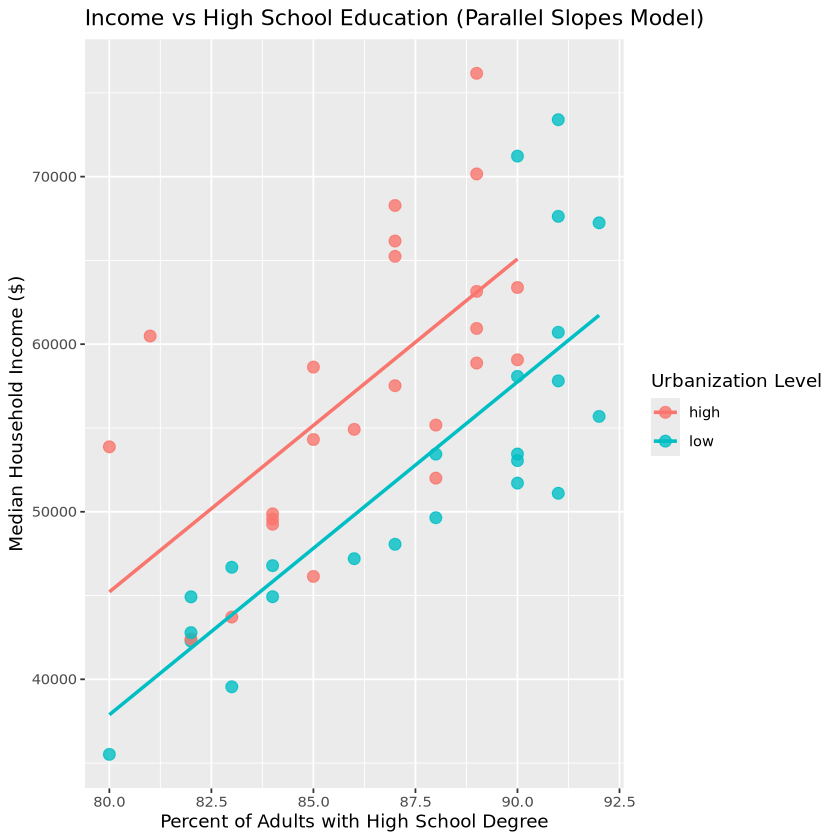

In [9]:
# Create scatterplot with parallel slopes
ggplot(hate_crimes, aes(x = hs, y = income, color = urbanization)) +
    geom_point(size = 3, alpha = 0.8) + 
    geom_parallel_slopes(se = FALSE) +
    labs(
        title = "Income vs High School Education (Parallel Slopes Model)",
        x = "Percent of Adults with High School Degree",
        y = "Median Household Income ($)",
        color = "Urbanization Level")

❓Which regression line (high urbanization or low urbanization) appears to have the larger intercept?

**Answer:**

### The highly urbanized level regression line has a larger intercept. When we look at the plot, the high urbanization line starts higher than the low urbanization line. This means states with high urbanization have higher baseline incomes even when we control for the education levels. 

Now let’s create a second scatterplot using the same variables, but this time draw the regression lines using `geom_smooth(method = "lm")`, which will allow for separate, non-parallel slopes for each urbanization group. 

**Code your scatter plot in the cell below.**

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 3 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”


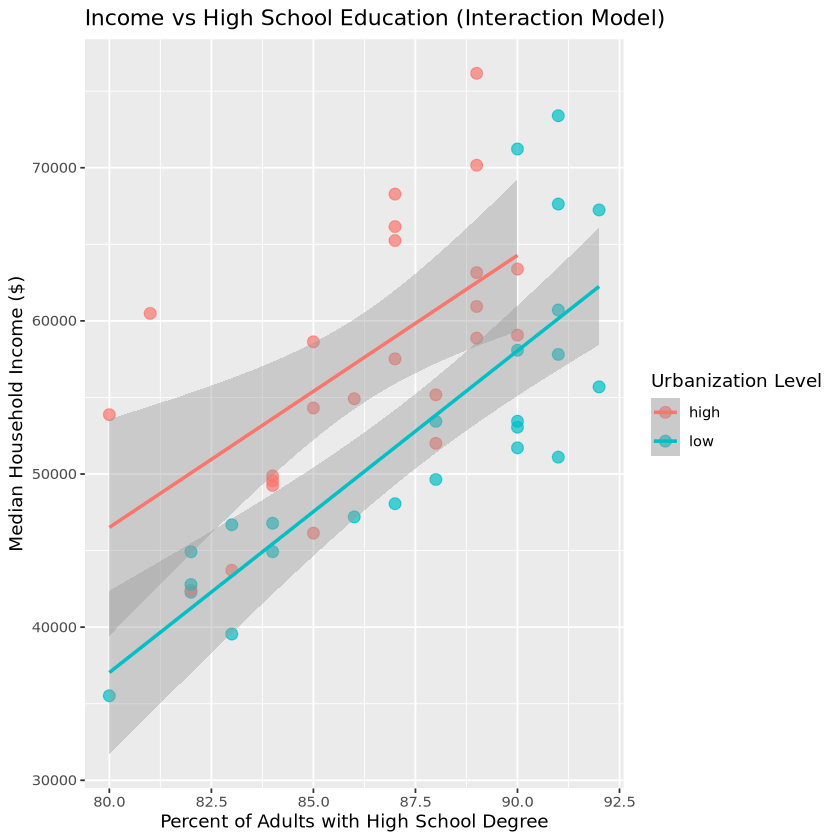

In [10]:
# Create scatterplot with non-parallel slopes
ggplot(hate_crimes, aes(x = hs, y = income, color = urbanization)) +
    geom_point(size = 3, alpha = 0.7) +
    geom_smooth(method = "lm", se = TRUE) +
    labs(
        title = "Income vs High School Education (Interaction Model)",
        x = "Percent of Adults with High School Degree",
        y = "Median Household Income ($)",
        color = "Urbanization Level")

❓Based on visually comparing the two models shown above, do you think it would be best to run a “parallel slopes” model (i.e., a model that estimates one shared slope for the two levels of urbanization), or a more complex “interaction model” (i.e., a model that estimates a separate slope for the two levels of urbanization)?

**Answer:**

### Since the non-parallel regression lines in the second model are only slightly different in slope, the parallel slopes model appears to capture the relationship well. The data points don't show a strong pattern suggesting dramatically different relationships between hs and income for the two urbanization groups

Fit the following two regression models that examine the relationship between household `income` (as response variable), and high-school education (`hs`) and `urbanization` as explanatory variables:

1. A parallel slopes model (i.e., no interaction between `hs` and `urbanization`). ❗️Save the data recipe and model under the variables `ps_rec` and `ps_mod`, respectively. 
1. A non-parallel slopes model (i.e., allow `hs` and `urbanization` to interact in your model). ❗️Save the data recipe and model under the variable: `nps_rec` and `nps_mod`, respectively.

**Code you your models in the cell below.**

In [13]:
# parallel slopes model

ps_rec = recipe(income ~ hs + urbanization, data = hate_crimes) |> 
    step_naomit(everything()) |>   # remove missing values
    step_dummy(urbanization) |>    # dummy encode the urbanization variable
    prep()                         # run the recipe on the training data provided

mod = linear_reg() |> set_engine('lm')

ps_mod = mod |> fit(income ~ ., juice(ps_rec))

ps_mod

parsnip model object


Call:
stats::lm(formula = income ~ ., data = data)

Coefficients:
     (Intercept)                hs  urbanization_low  
         -113725              1987             -7333  


In [14]:
# non-parallel slopes model

nps_rec = recipe(income ~ hs + urbanization, data = hate_crimes) |> 
    step_naomit(everything()) |>   # remove missing values
    step_dummy(urbanization) |>    # dummy encode the urbanization variable
    step_interact(~ starts_with("urbanization"):hs) |> # THIS IS WHAT MAKES IT NON-PARALLEL
    prep()                         # run the recipe on the training data provided

mod = linear_reg() |> set_engine('lm')

nps_mod = mod |> fit(income ~ ., juice(nps_rec))

nps_mod

parsnip model object


Call:
stats::lm(formula = income ~ ., data = data)

Coefficients:
          (Intercept)                     hs       urbanization_low  
               -95647                   1777                 -35394  
urbanization_low_x_hs  
                  324  


The following code creates a table of your model predictions over the training data. Calculate the [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination) (R<sup>2</sup>) for each model:

```r
rbind(
    augment(ps_mod, juice(ps_rec)) |> select(income, .pred, .resid) |> mutate(model = "parallel_slopes"),
    augment(nps_mod, juice(nps_rec)) |> select(income, .pred, .resid) |> mutate(model = "interaction")
)
```

1. Group rows by the `model` variable (use the `group_by` function).
1. Calculate the variance of income over the variance of your predictions for each model using the "grouped" data from the step above (use `summarize(r_squared = var(.pred) / var(income))`).

In [16]:
rbind(
    augment(ps_mod, juice(ps_rec)) |> select(income, .pred, .resid) |> mutate(model = "parallel_slopes"),
    augment(nps_mod, juice(nps_rec)) |> select(income, .pred, .resid) |> mutate(model = "interaction")
) |>
    group_by(model) |>
    summarize(r_squared = var(.pred) / var(income))

model,r_squared
<chr>,<dbl>
interaction,0.5746731
parallel_slopes,0.5716112


🎶 Note: you can also use the `glance` function with a model as input to find the coefficient of determination.

In [18]:
glance(ps_mod)
glance(nps_mod)

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.5716112,0.5525717,6325.667,30.02238,5.204241e-09,2,-486.6739,981.3479,988.8327,1800633086,45,48


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.5746731,0.5456735,6374.244,19.81661,2.814509e-08,3,-486.5018,983.0035,992.3595,1787763166,44,48


In [19]:
# Extract adjusted R² for comparison
ps_adj_r2 <- glance(ps_mod)$adj.r.squared
nps_adj_r2 <- glance(nps_mod)$adj.r.squared

cat("Parallel Slopes Adjusted R²:", round(ps_adj_r2, 4), "\n")
cat("Interaction Model Adjusted R²:", round(nps_adj_r2, 4), "\n")
cat("Difference:", round(nps_adj_r2 - ps_adj_r2, 4), "\n")

Parallel Slopes Adjusted R²: 0.5526 
Interaction Model Adjusted R²: 0.5457 
Difference: -0.0069 


❓Compare the adjusted proportion of variance accounted for in each model. Based on this comparison, which model do you prefer? Why? 

**Answer:**
### After comparing the adjusted proportion of variance accounted for in each model, I've decided that the parallel slopes model is better. When comparing the Adjusted R^2 values, we see that there is a 0.0069 improvement when choosing the parallel model over the non-parallel (interaction) model. The main reason for my preference is that the added complexity that comes from using a non-parallel model is not worthwhile when comparing the two models' R^2 or Adj. R^2 values. Since both models explain the data nearly equally well, the simpler model (parallel) seems ideal. Since the parallel model has one fewer parameter, it is easier to interpret. 

❓Using your preferred model, based on your regression model parameters (and the data visualizations), is `income` greater in states that have lower or higher levels of `urbanization`? By how much?

**Hint:** Use the `tidy` function with your model as input to access the parameters in a nice table.

**Answer:**
### Based on the information we see from the tidy function on the parallel model, it appears that income is higher in states with higher levels of urbanization. High urbanization states have median household incomes that are $7,333.33 higher than low urbanization states, when we control for high school education levels. 

### Since the urbanization_low coefficient is -7333.326, the negative values indicate that low urbanization states have incomes that are -$7333.33 lower than high urbanization states (our baseline). 

In [20]:
tidy(ps_mod)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-113725.193,23552.9187,-4.828497,1.624694e-05
hs,1986.794,272.9303,7.279490,3.930730e-09
urbanization_low,-7333.326,1857.6592,-3.947616,2.744526e-04


In [21]:
# View model coefficients
coefficients <- tidy(ps_mod)
print(coefficients)

# Extract the urbanization effect
urbanization_effect <- coefficients |> 
    filter(term == "urbanization_low") |> 
    pull(estimate)

print(urbanization_effect)

# A tibble: 3 × 5
  term             estimate std.error statistic       p.value
  <chr>               <dbl>     <dbl>     <dbl>         <dbl>
1 (Intercept)      -113725.    23553.     -4.83 0.0000162    
2 hs                  1987.      273.      7.28 0.00000000393
3 urbanization_low   -7333.     1858.     -3.95 0.000274     
[1] -7333.326


❓For every one percentage point increase of high-school educated adults in a state (`hs` variable), what is the associated average increase in `income`?

**Answer:**
### For every one percentage point increase of high-school educated adults in a state, the median household income increases by an average of $1,986.79. Since the slope for this model (hs) is 1,986.79, we can say that this is the effect that one extra percent of high-school educated adults in a state provide to the median income. This is true for both urbanization groups since I chose the parallel slopes model.

In [23]:
# Extract the hs slope
hs_slope <- coefficients |> 
    filter(term == "hs") |> 
    pull(estimate)

print(hs_slope)

[1] 1986.794
